In [1]:
import os
import pickle
import sys
sys.path.append("/Users/loaloa/homedataAir/phd/ratvr/VirtualReality/analysisVR")
sys.path.append("/Users/loaloa/homedataAir/phd/ratvr/VirtualReality/ephysVR")


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

from analytics_processing import analytics
import analytics_processing.analytics_constants as C
from CustomLogger import CustomLogger as Logger

from dashsrc.plot_components.plot_wrappers.data_selection import group_filter_data

from analytics_processing.modality_loading import session_modality_from_nas
from analytics_processing.sessions_from_nas_parsing import sessionlist_fullfnames_from_args


/Users/loaloa/homedataAir/phd/ratvr/VirtualReality/analysisVR/analytics_processing/modality_loading.py:124: SyntaxWarning: "is" with 'tuple' literal. Did you mean "=="?
  elif data is None or data is (None,None):


In [3]:
output_dir = "./outputs/experimental/"
data = {}
nas_dir = C.device_paths()[0]
Logger().init_logger(None, None, logging_level="INFO")



In [4]:
# ephys
paradigm_ids = [1100]
animal_ids = [6]
session_ids = None
# animal_ids = [10]
# session_ids = [7,8]
width = 1400
height = 1400
group_by = None

session_modality_from_nas

<function analytics_processing.modality_loading.session_modality_from_nas(session_fullfname, key, where=None, start=None, stop=None, columns=None)>

In [ ]:
# ephys
paradigm_ids = [1100]
animal_ids = [6]
session_ids = None

session_dirs = sessionlist_fullfnames_from_args(paradigm_ids, animal_ids, session_ids)[0]
aggr = []
for sd in session_dirs:
    # if not sd.endswith("2024-11-25_16-25_rYL006_P1100_LinearTrackStop_18min.hdf5"):
    #     continue
    bv = session_modality_from_nas(sd, 'event', columns=['event_ephys_timestamp'],stop=1)
    print(os.path.basename(sd))
    aggr.append(bv.iloc[0,0])
    print(aggr[-1])
    print("--")

# np.median(pd.Series(aggr).dropna()/1_000_000)
# aggr

plt.hist(aggr, bins=100)
plt.show()


2024-11-14_15-01_rYL006_P1100_LinearTrackStop_30min.hdf5
nan
--
2024-11-14_16-40_rYL006_P1100_LinearTrackStop_21min.hdf5
12238100.0
--
2024-11-15_15-48_rYL006_P1100_LinearTrackStop_35min.hdf5
1846400.0
--
2024-11-20_17-46_rYL006_P1100_LinearTrackStop_22min.hdf5
8312600.0
--
2024-11-21_17-22_rYL006_P1100_LinearTrackStop_25min.hdf5
7852750.0
--
2024-11-22_16-01_rYL006_P1100_LinearTrackStop_24min.hdf5
nan
--
   event_ephys_timestamp
0            245045900.0
   event_ephys_timestamp
0               820000.0


NameError: name 'exit' is not defined

In [ ]:
data['SpikeClusterMetadata'].reset_index(drop=True)

,cluster_id_ssbatch,cluster_id,cluster_channel,cluster_type,unit_count,unit_snr,unit_Vpp,unit_isi_ratio,unit_iso_dist,unit_L_ratio,...,mea1k_connectivity,connectivity_order,ss_batch_name,ss_batch_id,shank_side,curated_trace,depth,shank_id,session_nsamples,cluster_color
0,1,1,296,single,44619,6.475497,389.497498,0.173228,NaN,0.306243,...,37.830444,1,2025-04-23_08-39_rYL006_431_concat_ss_finalMin...,0,left,True,5670,2,6421000,#E15F99
1,2,2,300,3-ISI,208600,4.558548,336.835815,0.722571,NaN,0.285531,...,38.125034,1,2025-04-23_08-39_rYL006_431_concat_ss_finalMin...,0,left,False,5770,2,6421000,#1CA71C
2,3,3,298,single,11050,4.637581,348.282898,0.517730,44.603046,21.841883,...,38.814781,1,2025-04-23_08-39_rYL006_431_concat_ss_finalMin...,0,right,True,5710,2,6421000,#FB0D0D
3,4,4,310,5-ISI,18939,5.504494,335.664001,0.492537,646.765930,1.058707,...,38.573307,1,2025-04-23_08-39_rYL006_431_concat_ss_finalMin...,0,right,True,6110,2,6421000,#DA16FF
4,5,5,312,single,23034,5.848962,309.657593,0.198254,NaN,0.217167,...,38.199005,1,2025-04-23_08-39_rYL006_431_concat_ss_finalMin...,0,right,True,6190,2,6421000,#222A2A
5,6,6,332,single,31773,9.302877,798.770752,0.195380,134.657181,1.620632,...,38.161266,1,2025-04-23_08-39_rYL006_431_concat_ss_finalMin...,0,right,False,6830,2,6421000,#B68100
6,7,7,338,8-ISI,338026,4.876700,332.652588,0.333038,NaN,0.739609,...,38.248032,1,2025-04-23_08-39_rYL006_431_concat_ss_finalMin...,0,right,True,6990,2,6421000,#750D86
7,8,8,338,single,141387,6.510406,416.889954,0.149644,81.273582,1.795598,...,38.248032,1,2025-04-23_08-39_rYL006_431_concat_ss_finalMin...,0,right,True,6990,2,6421000,#EB663B
8,9,9,364,single,7598,6.398713,435.890717,0.288503,40.068501,47.037045,...,38.327358,1,2025-04-23_08-39_rYL006_431_concat_ss_finalMin...,0,left,True,7690,2,6421000,#511CFB
9,10,10,337,single,19602,5.741525,377.584229,0.077227,116.315369,5.083454,...,38.502911,1,2025-04-23_08-39_rYL006_431_concat_ss_finalMin...,0,left,True,6970,2,6421000,#00A08B


In [ ]:
# 10,9,7

raw = data['ephys_traces'][[10,9,7], 20_000:25_000]

In [ ]:
raw.shape

(3, 5000)

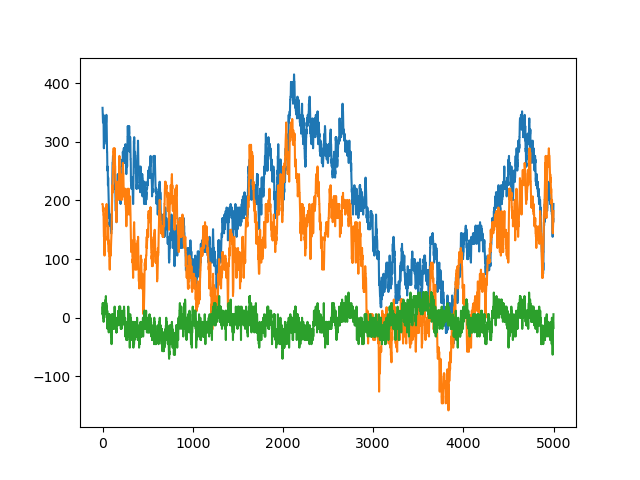

In [ ]:
plt.close()
plt.plot(raw.T)
plt.show()